# Import packages and set settings

In [1]:
%load_ext autoreload
%autoreload 2

import sys
# sys.path.insert(1, './python_mods/')
sys.path.insert(1, '../python_modules')
import plotting_OM_K as plotting
import model_supp 
import model

In [86]:
%matplotlib inline
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import os
import collections
import h5py

In [84]:
# plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [10.0, 8.0]
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['legend.fontsize'] = 10
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

# Model

## Model Variables (Constants)

In [4]:
dt = 0.1
steps = 601
time = np.linspace(0,dt*steps,steps)

# Protein concentrations (mM) #2
# Sln1_tot = model_supp.molarity_conversion(1176)
Sho1_tot = model_supp.molarity_conversion(4076)
Hog1_tot = model_supp.molarity_conversion(8225)
total_protein = [Sho1_tot, Hog1_tot, 0] #mM

# initial values
Sln1 = 0
Sho1 = 0
Hog1_AC = 0
Hog1_AN = 0
Hog1_IN = 0.23 * Hog1_tot
Glycerol = 0.0001
inits = [Sho1, Hog1_AC, Hog1_AN, Hog1_IN, Glycerol]

# doses
doses = [150, 350, 550]

# Parameter ranges
number_of_params = 23
minimums = [-8, 0, -8,
        0, -8,
        0, -8, -8, -8, -2,
        -4, 0, -4, -2, -4,
        -8, 0, -4, -4, 0,
        -8, -8, 0
        ]

maximums = [0, 8, 0,
        8, 0,
        8, 0, 0, 0, 6,
        4, 8, 4, 6, 4,
        0, 8, 4, 4, 8,
        0, 2, 8
        ]

labelnames = ['$baseosmo$', '$k2$', '$K2$', 
              '$k4$', '$K4$', '$k6$','$K56$',
              '$k7$', '$K7$', '$k8$','$K8$','$k9A$','$K9a$','$k9B$','$K9b$','$k10$', '$K10$', 
              '$k11$','$K11$','$k12$', '$k13$', '$k14$', '$k15$']

diff = np.asarray(maximums)-np.asarray(minimums) #for plotting
dims = (diff, minimums) #for plotting

# Load experimental data

In [5]:
exp_data, exp_time = model_supp.get_data(input='30perc')

wt_phospho_data, wt_nuc_data = exp_data
phospho_time, nuc_time = exp_time 

# Load simulation data

In [6]:
model_fxns = model.Model(model.OM_simp_Sho1exp)

In [7]:
folder = '../sim_data/200527_OM_30_Sho1exp'

all_params, last_params, all_mses, last_mses = model_supp.get_sim_data(folder, num_sims=2000)
sorted_mses_EA, sorted_thetas_EA = model_supp.sort_mses_thetas(last_mses, last_params)

Number of runs collected: 479
Best last gen MSE: 387.21921524047286
Mean last gen MSEs of top 5%: 522.3071212555105


# Saving info

In [101]:
base_save_f = 'C:/Users/sksuzuki/Documents/Research/Thesis/Dissertation/Figures/Chapter 3/Figure 3/'

# Check EA results

<Figure size 720x576 with 0 Axes>

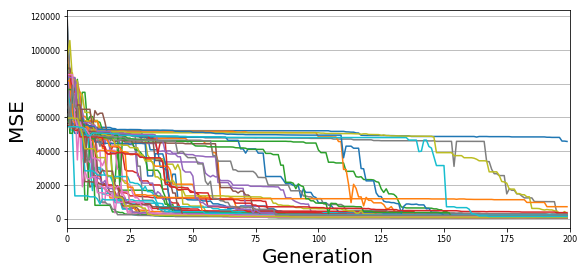

In [8]:
plotting.plt_mses_gen(200, all_mses, 50)

No handles with labels found to put in legend.


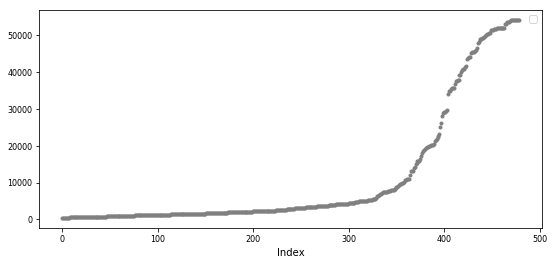

In [9]:
plotting.plt_idx_vs_mse(sorted_mses_EA, len(sorted_mses_EA))

No handles with labels found to put in legend.


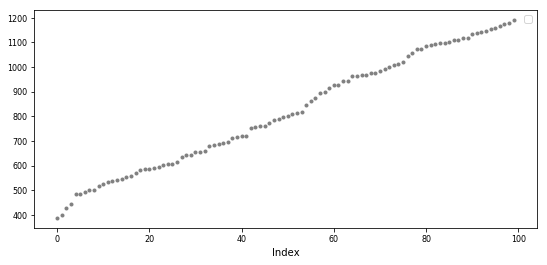

In [10]:
plotting.plt_idx_vs_mse(sorted_mses_EA, 100)

Dose: 150 complete.
Dose: 350 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

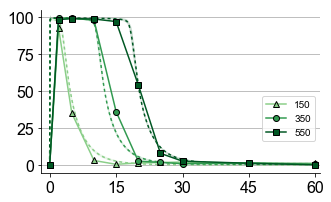

In [22]:
plotting.plt_param_cis(model_fxns, sorted_thetas_EA[1:10], total_protein, inits,  doses, time, param='phospho',
                        exp_data=wt_phospho_data, exp_time=phospho_time, ss=True, ci='sd',
                        save_fig='')

Dose: 150 complete.
Dose: 350 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

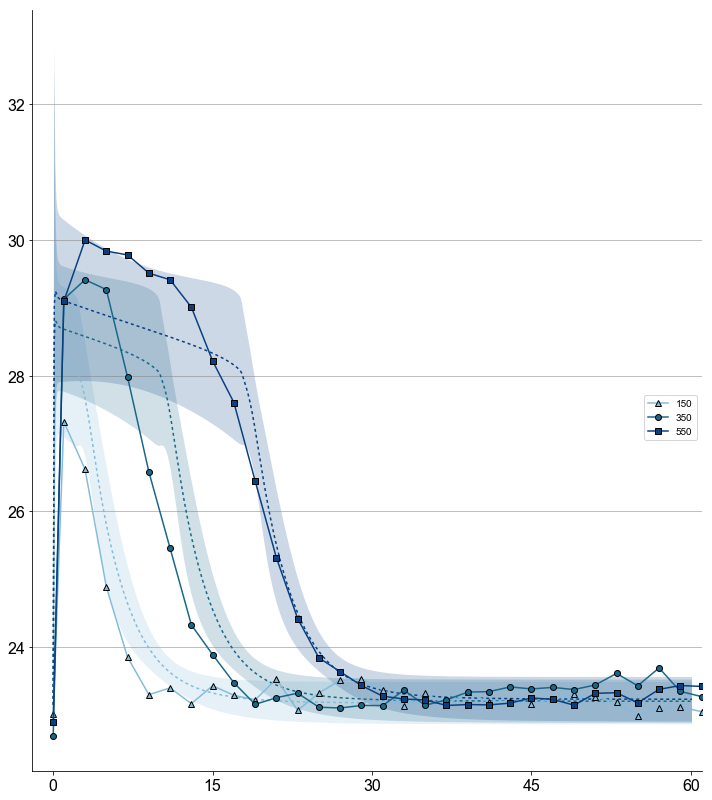

In [202]:
plotting.plt_param_cis(model_fxns, sorted_thetas_EA[1:10], total_protein, inits,  doses, time, param='nuc',      
                        exp_data=wt_nuc_data, exp_time=nuc_time, ss=True, ci='sd',
                        save_fig='')

In [ ]:
# plotting.plt_param_cis(model_fxns, sorted_thetas_EA[0:7], total_protein, inits,  doses, time, param='nuc',      
#                         exp_data=wt_nuc_data, exp_time=nuc_time, ss=True, ci='sd',
#                         save_fig='')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<Figure size 720x576 with 0 Axes>

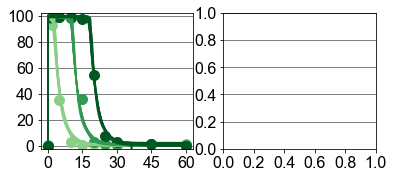

In [18]:
# PLOT INDIVIDUAL SIMS
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA, 10, total_protein, inits,  doses, time, 'phospho', wt_phospho_data, mapk_time=phospho_time,ss=True)

<Figure size 720x576 with 0 Axes>

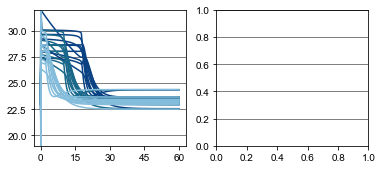

In [204]:
# PLOT INDIVIDUAL SIMS
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA[1:11], 20, total_protein, inits,  doses[::-1], time, 'nuc', None, mapk_time=nuc_time,ss=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<Figure size 720x576 with 0 Axes>

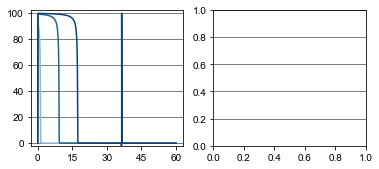

In [40]:
#sho1 only
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA, 1, total_protein, inits,  doses, time, 'sho1', mapk_wt_data=None, mapk_time=nuc_time,ss=True)

In [30]:
# sln1 only
# plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA, 1, total_protein, inits,  doses, time, 'sln1', mapk_wt_data=None, mapk_time=nuc_time,ss=True)

In [32]:
# # sln1 only
# sln1 = sorted_thetas_EA[0].copy()
# sln1[10]=0
# plotting.plt_param_behaviors(model_fxns, np.array([sln1]), 1, total_protein, inits,  doses, time, 'phospho', wt_phospho_data, mapk_time=phospho_time,ss=True)

<Figure size 720x576 with 0 Axes>

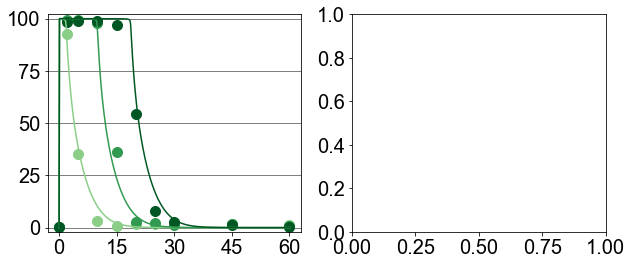

In [48]:
# # sho1 only
# sho1 = sorted_thetas_EA[0].copy()
# sho1[9]=0
# plotting.plt_param_behaviors(model_fxns, np.array([sho1]), 1, total_protein, inits,  doses, time, 'phospho', wt_phospho_data, mapk_time=phospho_time,ss=True)

<Figure size 720x576 with 0 Axes>

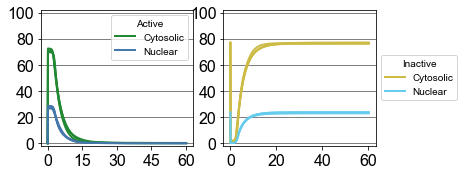

In [24]:
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA[1:], 3, total_protein, inits, [150], time, 'all Hog1', mapk_wt_data=None, mapk_time=phospho_time,ss=True)

<Figure size 720x576 with 0 Axes>

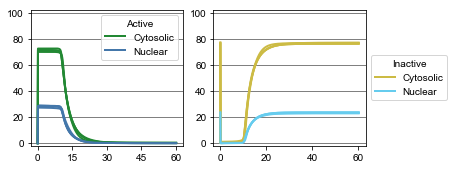

In [25]:
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA[1:], 3, total_protein, inits, [350], time, 'all Hog1', mapk_wt_data=None, mapk_time=phospho_time,ss=True)

<Figure size 720x576 with 0 Axes>

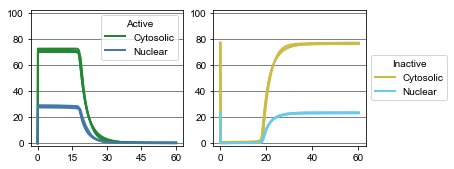

In [26]:
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA[1:], 3, total_protein, inits, [550], time, 'all Hog1', mapk_wt_data=None, mapk_time=phospho_time,ss=True)

## Separate species

C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warn

<Figure size 720x576 with 0 Axes>

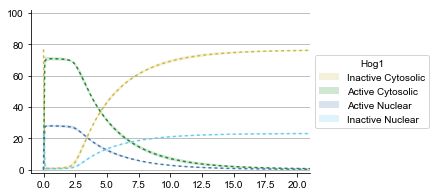

In [119]:
plotting.plt_all_hog1_cis(model_fxns, sorted_thetas_EA[1:5], total_protein, inits,  150, time, param='all Hog1',      
                        exp_data=None, exp_time=None, ss=True, ci='sd',
                        save_fig='')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warn

<Figure size 720x576 with 0 Axes>

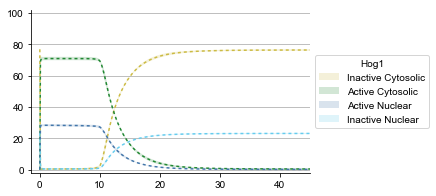

In [120]:
plotting.plt_all_hog1_cis(model_fxns, sorted_thetas_EA[1:5], total_protein, inits,  350, time, param='all Hog1',      
                        exp_data=None, exp_time=None, ss=True, ci='sd',
                        save_fig='')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warn

<Figure size 720x576 with 0 Axes>

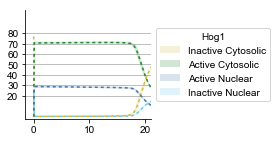

In [125]:
plotting.plt_all_hog1_cis(model_fxns, sorted_thetas_EA[1:10], total_protein, inits,  550, time, param='all Hog1',      
                        exp_data=None, exp_time=None, ss=True, ci='sd',
                        save_fig=base_save_f+ 'test')

<Figure size 720x576 with 0 Axes>

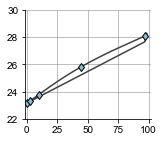

In [139]:
plotting.plt_nuc_vs_cyto(model_fxns, sorted_thetas_EA[1:10], total_protein, inits,  150, time, param='all Hog1',      
                        exp_data=None, exp_time=phospho_time[:5], ss=True, ci='sd',save_fig=base_save_f+'Fig3B1a')

<Figure size 720x576 with 0 Axes>

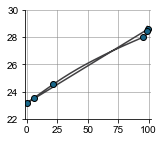

In [138]:
plotting.plt_nuc_vs_cyto(model_fxns, sorted_thetas_EA[1:10], total_protein, inits,  350, time, param='all Hog1',      
                        exp_data=None, exp_time=phospho_time[:6], ss=True, ci='sd',save_fig=base_save_f+'Fig3B1b')
#                         save_fig=base_save_f+'Fig2D3')

<Figure size 720x576 with 0 Axes>

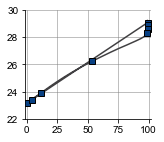

In [137]:
plotting.plt_nuc_vs_cyto(model_fxns, sorted_thetas_EA[1:10], total_protein, inits,  550, time, param='all Hog1',      
                        exp_data=None, exp_time=phospho_time[:8], ss=True, ci='sd',save_fig=base_save_f+'Fig3B1c')
#                         save_fig=base_save_f+'Fig2D3')

<Figure size 720x576 with 0 Axes>

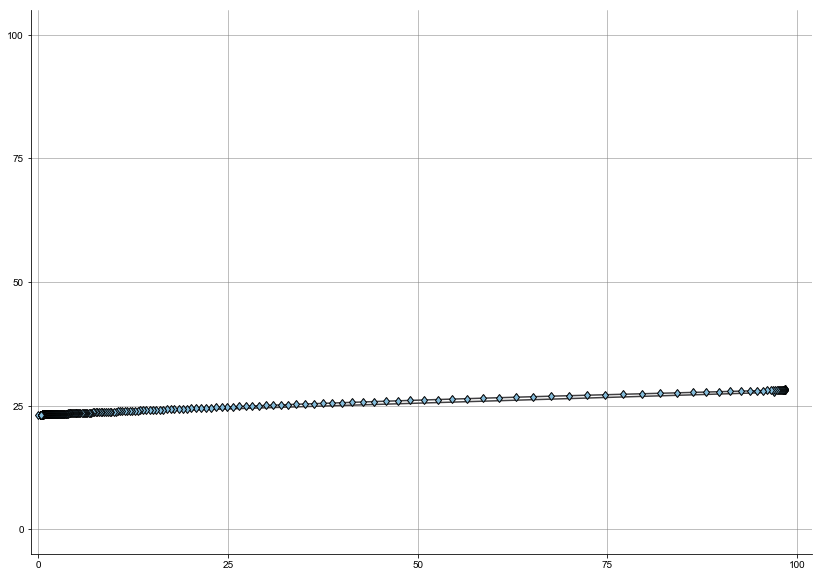

In [103]:
plotting.plt_nuc_vs_cyto(model_fxns, sorted_thetas_EA[1:10], total_protein, inits,  150, time, param='all Hog1',      
                        exp_data=None, exp_time=time, ss=True, ci='sd')

<Figure size 720x576 with 0 Axes>

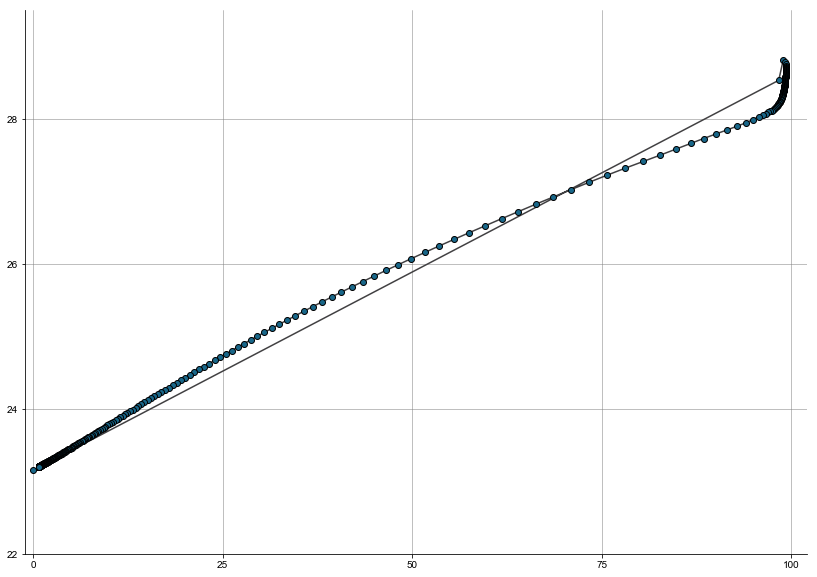

In [95]:
plotting.plt_nuc_vs_cyto(model_fxns, sorted_thetas_EA[1:10], total_protein, inits,  350, time, param='all Hog1',      
                        exp_data=None, exp_time=time, ss=True, ci='sd')
# plt.rcParams['figure.figsize'] = [10.0, 8.0]


<Figure size 720x576 with 0 Axes>

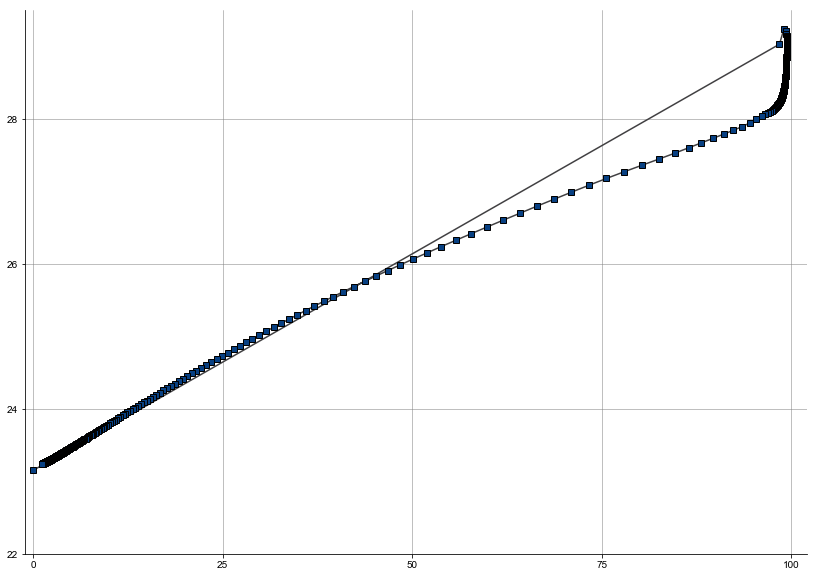

In [96]:
plotting.plt_nuc_vs_cyto(model_fxns, sorted_thetas_EA[1:10], total_protein, inits,  550, time, param='all Hog1',      
                        exp_data=None, exp_time=time, ss=True, ci='sd')

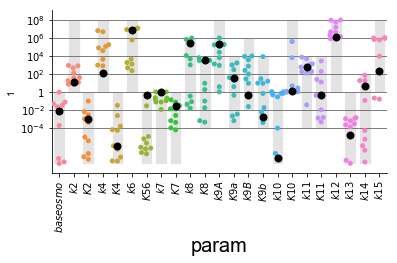

In [49]:
df_top_thetas_EA = pd.DataFrame(sorted_thetas_EA)
df_top_thetas_EA.columns = labelnames

xnum_plt = 0
num_plt = 10
df_plt = sorted_thetas_EA[xnum_plt:num_plt]
df_plt = pd.DataFrame(sorted_thetas_EA[xnum_plt:num_plt])
df_plt.columns = labelnames
df_plt_log = df_plt.apply(np.log10)
df_plt_log_M = df_plt_log.melt(var_name='param', value_name='vals')
plotting.plt_param_ranges(labelnames, 'M19', dims, df_plt_log_M, single_theta=df_plt_log, num=1) #black dot is best param
#print(df_plt)

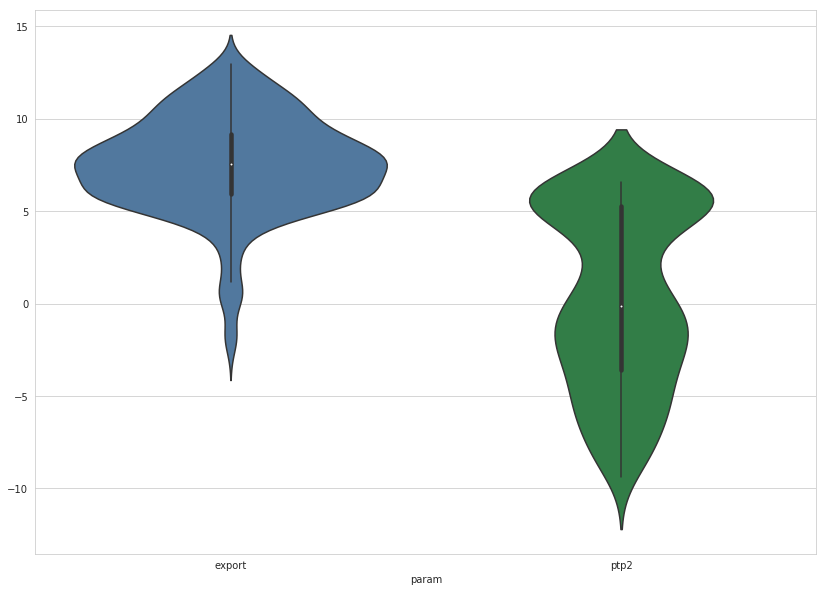

In [325]:
# catalytic efficiency

test = plotting.calc_catalyic_efficiency(labelnames, df_top_thetas_EA[1:500])#, save_fig = base_save_f + 'Fig3Ca')

In [333]:
from scipy.stats import mannwhitneyu
mannwhitneyu(test[0], test[1])

MannwhitneyuResult(statistic=19810.0, pvalue=9.714571376847728e-109)

In [334]:
from scipy.stats import wilcoxon
wilcoxon(test[0], test[1])

WilcoxonResult(statistic=3315.0, pvalue=3.0568127853972923e-71)

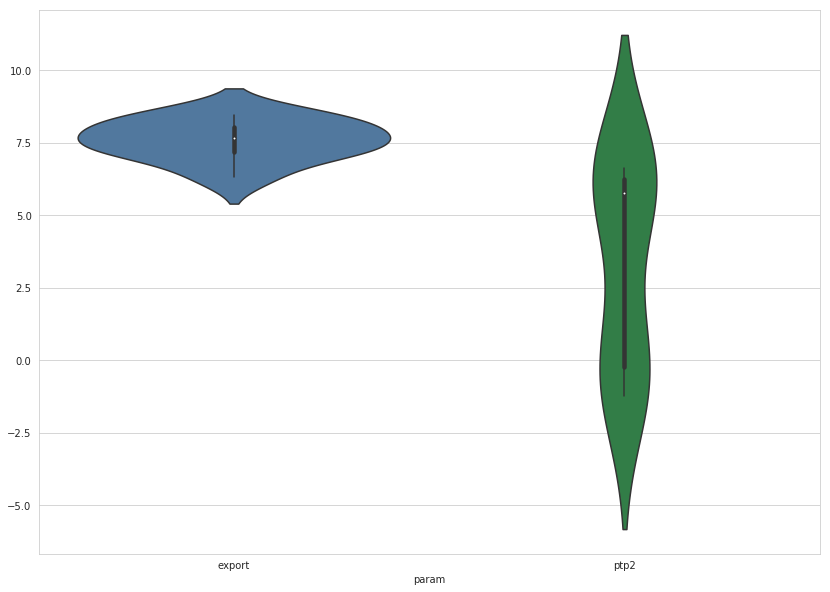

In [305]:
# catalytic efficiency

plotting.calc_catalyic_efficiency(labelnames, df_top_thetas_EA[1:10])#, save_fig = base_save_f + 'Fig3Ca')

54


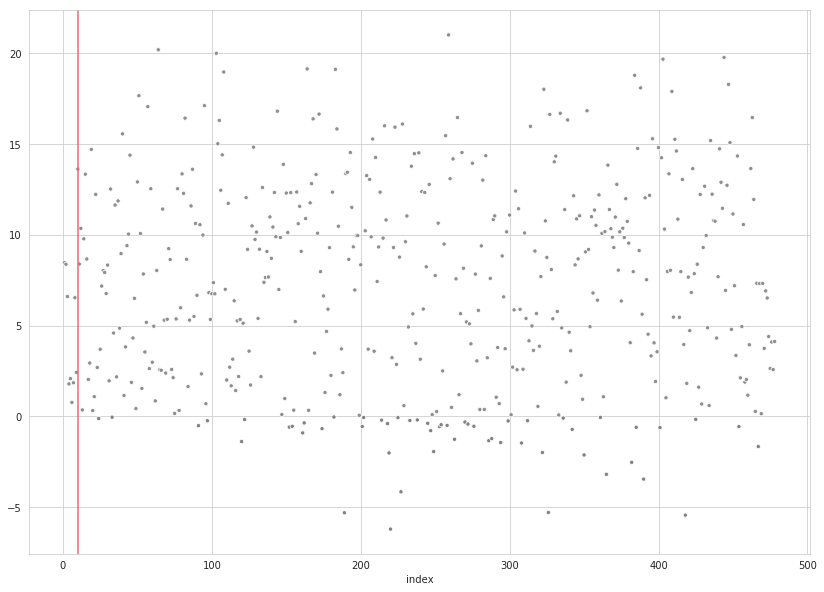

In [335]:
plotting.calc_diff_in_AC(labelnames, df_top_thetas_EA[1:500])#, save_fig = base_save_f + 'Fig3Cb')

In [513]:
# dose-to-amplitude idx: 9, 1
param_set = sorted_thetas_EA[1]

<Figure size 720x576 with 0 Axes>

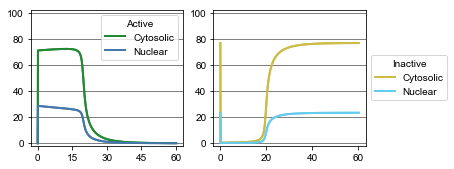

In [506]:
plotting.plt_param_behaviors(model_fxns, [param_set], 3, total_protein, inits, [550], time, 'all Hog1', mapk_wt_data=None, mapk_time=phospho_time,ss=True)

<Figure size 720x576 with 0 Axes>

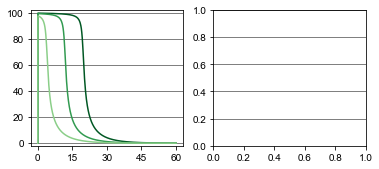

In [507]:
plotting.plt_param_behaviors(model_fxns, [param_set], 20, total_protein, inits,  doses[::-1], time, 'phospho', None, mapk_time=nuc_time,ss=True)

<Figure size 720x576 with 0 Axes>

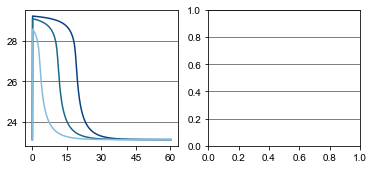

In [514]:
plotting.plt_param_behaviors(model_fxns, [param_set], 20, total_protein, inits,  doses[::-1], time, 'nuc', None, mapk_time=nuc_time,ss=True)

<Figure size 720x576 with 0 Axes>

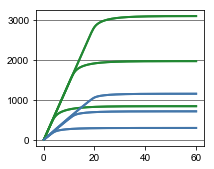

In [512]:
plotting.plt_param_integrals(model_fxns, [param_set], 1, total_protein, inits, [150, 350, 550], time, 'all Hog1', mapk_wt_data=None, mapk_time=phospho_time,ss=True)

<Figure size 720x576 with 0 Axes>

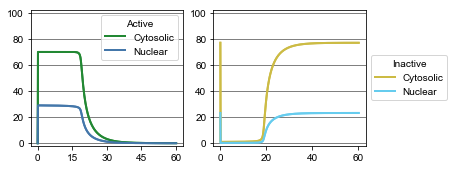

In [447]:
# high favor k9B : elim k10 idx = 15
test = sorted_thetas_EA[1].copy()
test[15] = 0
plotting.plt_param_behaviors(model_fxns, [test], 3, total_protein, inits, [550], time, 'all Hog1', mapk_wt_data=None, mapk_time=phospho_time,ss=True)

<Figure size 720x576 with 0 Axes>

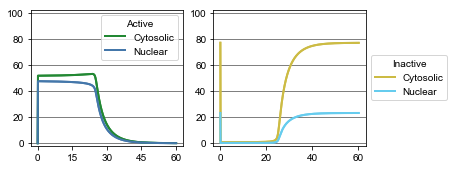

In [524]:
# high favor k9B : elim k9B idx = 13 , finding steady state at 30% nuclear, but how much of it is just staying in the nucleus? can you measure that with ODEs? maybe need a statistical method.
test = sorted_thetas_EA[1].copy()
test[13] = test[13]#/2
plotting.plt_param_behaviors(model_fxns, [test], 3, total_protein, inits, [550], time, 'all Hog1', mapk_wt_data=None, mapk_time=phospho_time,ss=True)

<Figure size 720x576 with 0 Axes>

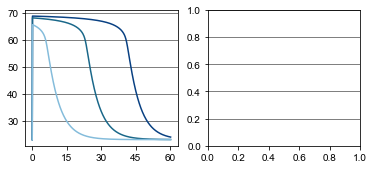

In [521]:
plotting.plt_param_behaviors(model_fxns, [test], 20, total_protein, inits,  doses[::-1], time, 'nuc', None, mapk_time=nuc_time,ss=True)

In [360]:
len(sorted_thetas_EA[1])

23

<Figure size 720x576 with 0 Axes>

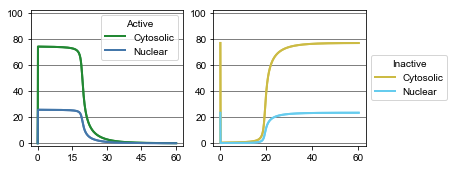

In [498]:
# high favor k9B : elim k22 - positive feedforward (now limited to 28% nuclear, so 350 and 550 cam down to 150 levels) 
test = sorted_thetas_EA[9].copy()
test[22] = 0#test[22]*10
plotting.plt_param_behaviors(model_fxns, [test], 3, total_protein, inits, [550], time, 'all Hog1', mapk_wt_data=None, mapk_time=phospho_time,ss=True)

<Figure size 720x576 with 0 Axes>

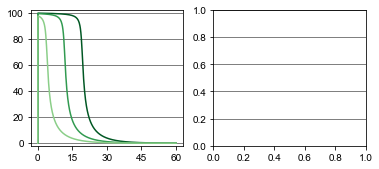

In [499]:
plotting.plt_param_behaviors(model_fxns, [test], 20, total_protein, inits,  doses[::-1], time, 'phospho', None, mapk_time=nuc_time,ss=True)

<Figure size 720x576 with 0 Axes>

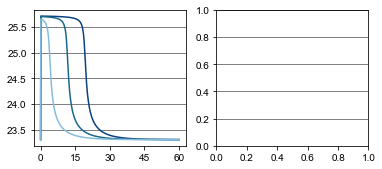

In [500]:
plotting.plt_param_behaviors(model_fxns, [test], 20, total_protein, inits,  doses[::-1], time, 'nuc', None, mapk_time=nuc_time,ss=True)

<Figure size 720x576 with 0 Axes>

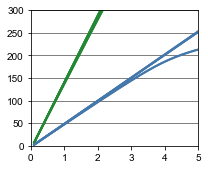

In [504]:
plotting.plt_param_integrals(model_fxns, [test], 1, total_protein, inits, [150, 350, 550], time, 'all Hog1', mapk_wt_data=None, mapk_time=phospho_time,ss=True)

<Figure size 720x576 with 0 Axes>

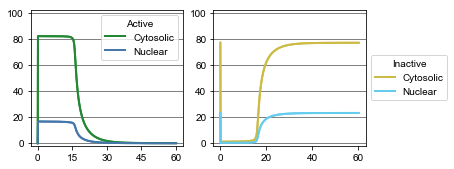

In [418]:
# high favor k9B : elim k8 - nuclear import (without feedforward)
test = sorted_thetas_EA[1].copy()
test[9] = test[9]/2
plotting.plt_param_behaviors(model_fxns, [test], 3, total_protein, inits, [550], time, 'all Hog1', mapk_wt_data=None, mapk_time=phospho_time,ss=True)

<Figure size 720x576 with 0 Axes>

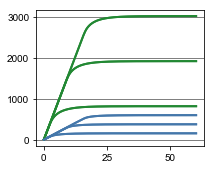

In [419]:
plotting.plt_param_integrals(model_fxns, [test], 1, total_protein, inits, [150, 350, 550], time, 'all Hog1', mapk_wt_data=None, mapk_time=phospho_time,ss=True)

<Figure size 720x576 with 0 Axes>

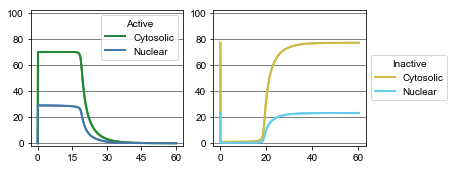

In [369]:
# high favor k9B : elim k21 - positive feedback AC - no change in dynamics
test = sorted_thetas_EA[1].copy()
test[21] = 0#test[21]/5
plotting.plt_param_behaviors(model_fxns, [test], 3, total_protein, inits, [550], time, 'all Hog1', mapk_wt_data=None, mapk_time=phospho_time,ss=True)

<Figure size 720x576 with 0 Axes>

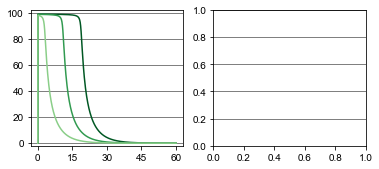

In [371]:
plotting.plt_param_behaviors(model_fxns, [test], 20, total_protein, inits,  doses[::-1], time, 'phospho', None, mapk_time=nuc_time,ss=True)

<Figure size 720x576 with 0 Axes>

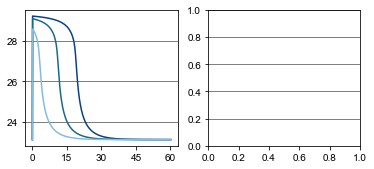

In [370]:
plotting.plt_param_behaviors(model_fxns, [test], 20, total_protein, inits,  doses[::-1], time, 'nuc', None, mapk_time=nuc_time,ss=True)

<Figure size 720x576 with 0 Axes>

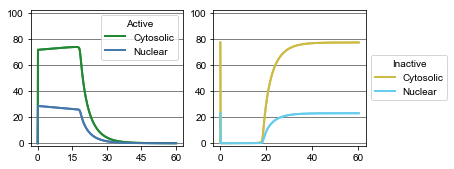

In [337]:
# low favor k9B : elim k10 idx = 15
test = sorted_thetas_EA[13].copy()
test[15] = 0
plotting.plt_param_behaviors(model_fxns, [test], 3, total_protein, inits, [550], time, 'all Hog1', mapk_wt_data=None, mapk_time=phospho_time,ss=True)

<Figure size 720x576 with 0 Axes>

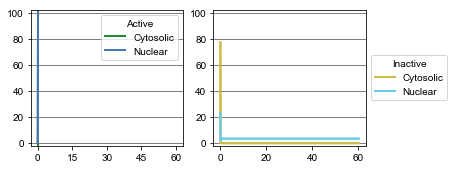

In [322]:
# low favor k9B : elim k9B idx = 13 
test = sorted_thetas_EA[13].copy()
test[13] = 0
plotting.plt_param_behaviors(model_fxns, [test], 3, total_protein, inits, [550], time, 'all Hog1', mapk_wt_data=None, mapk_time=phospho_time,ss=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<Figure size 720x576 with 0 Axes>

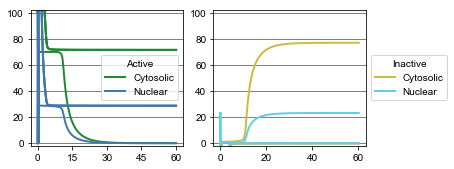

In [59]:
# try changing inits <- not convinced it does much, might need to test the inhib model
inits_AC = [Sho1, Hog1_tot, Hog1_AN, Hog1_IN, Glycerol]
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA[1:5], 3, total_protein, inits_AC, [350], time, 'all Hog1', mapk_wt_data=None, mapk_time=phospho_time,ss=True)

In [ ]:
plotting.plt_all_hog1_cis(model_fxns, sorted_thetas_EA[0:5], total_protein, inits,  550, time, param='all Hog1',      
                        exp_data=None, exp_time=None, ss=True, ci='sd',
                        save_fig=base_save_f+'Fig2D3')

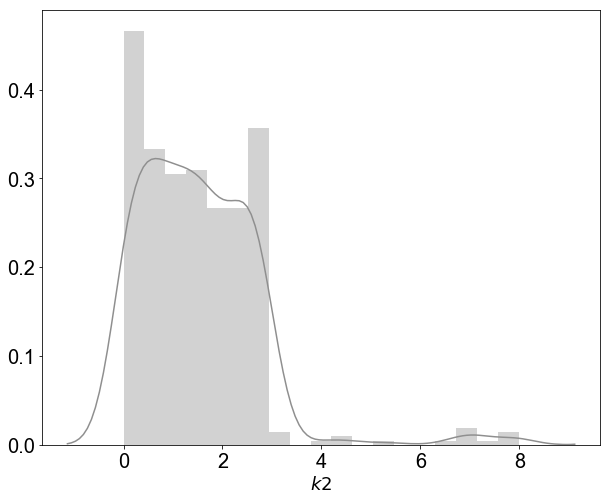

In [30]:
sns.distplot(np.log10(df_top_thetas_EA[labelnames[3]]))

# Check ABC - SMC

In [91]:
base_folder = 'C:/Users/sksuzuki/Documents/GitHub/HOG_encoding_feedbacks/python_modules/ABC_SMC/200121_M3c_ea_abc_smc/'

ea = h5py.File(base_folder+'200121_M3c_ea_abc_smc_0000.hdf5', 'r')

In [93]:
list(ea.keys())

['mses', 'thetas']

In [94]:
ea_thetas = ea['thetas']
ea_mses = ea['mses']

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\o

Dose: 0 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 50000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 150000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 250000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 350000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 450000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

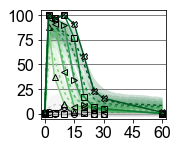

In [96]:
plotting.plt_param_cis(model_fxns, ea_thetas, params_constants, initials,  doses, time, 2,
                        exp_data=mapk_wt_data, exp_time=mapk_time, ss=True, ci='sd',
                        save_fig='')

In [97]:
e1 = h5py.File(base_folder+'200121_M3c_ea_abc_smc_0001.hdf5', 'r')

In [98]:
e1_thetas = e1['thetas']
e1_mses = e1['mses']

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Dose: 0 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 50000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 150000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 250000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 350000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 450000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

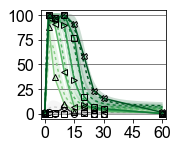

In [99]:
plotting.plt_param_cis(M2c_fxns, e1_thetas, params_constants, initials,  doses, time, 2,
                        exp_data=mapk_wt_data, exp_time=mapk_time, ss=True, ci='sd',
                        save_fig='')

In [100]:
e4 = h5py.File(base_folder+'200121_M3c_ea_abc_smc_0004.hdf5', 'r')

e4_thetas = e4['thetas']
e4_mses = e4['mses']

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Dose: 0 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 50000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 150000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 250000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 350000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 450000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

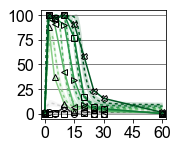

In [102]:
plotting.plt_param_cis(M2c_fxns, e4_thetas, params_constants, initials,  doses, time, 2,
                        exp_data=mapk_wt_data, exp_time=mapk_time, ss=True, ci='sd',
                        save_fig='test03')